In [6]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%load_ext holoviews.ipython

The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


In [7]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [8]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)
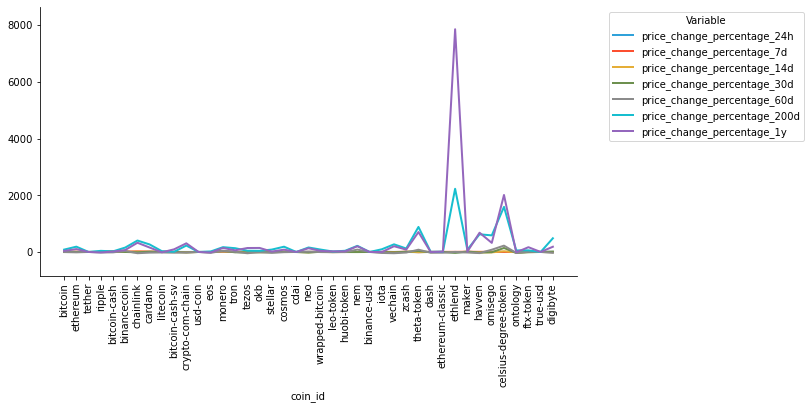

In [9]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

---

### Prepare the Data

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [14]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_market_scaled["Ticker"] = df_market_data.index

# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index("Ticker")

# Display sample data
df_market_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Ticker,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [15]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [16]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # 2. Fit the model to the scaled data
    kmeans.fit(df_market_scaled)
    
    # 3. Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)



In [17]:
# Create a dictionary with k-values as keys and their corresponding inertia values
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data for plotting the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.127997
5,6,52.933559
6,7,43.926256
7,8,36.791070
8,9,32.678899
9,10,29.081916


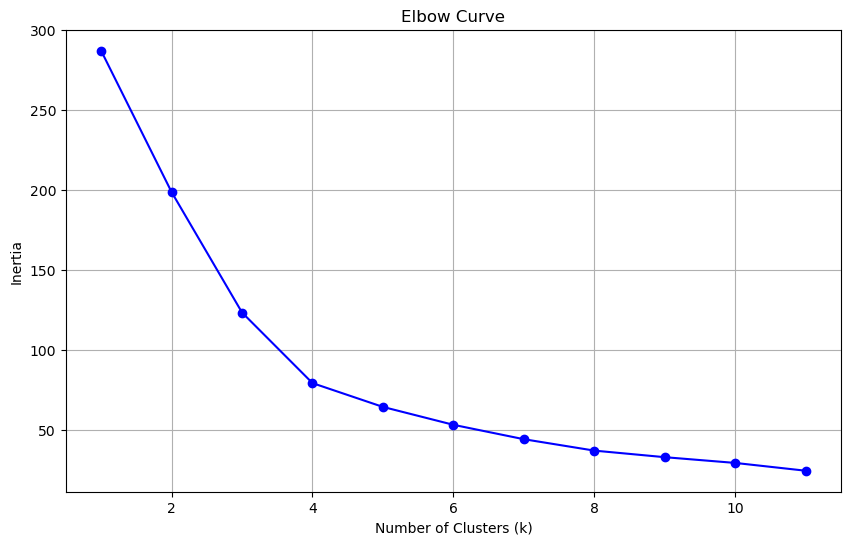

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The optimal value for k is likely 4. There might be an argument for it to be 5 instead, but it's difficult to know for sure without plotting the clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0, n_init=10)

In [20]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
k_4

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [22]:
# Create a copy of the DataFrame
df_market_predictions = df_market_scaled.copy()

In [23]:
# Add a new column to the DataFrame with the predicted clusters
df_market_predictions["Clusters"] = k_4

# Display sample data
df_market_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
Ticker,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Clusters,Ticker)
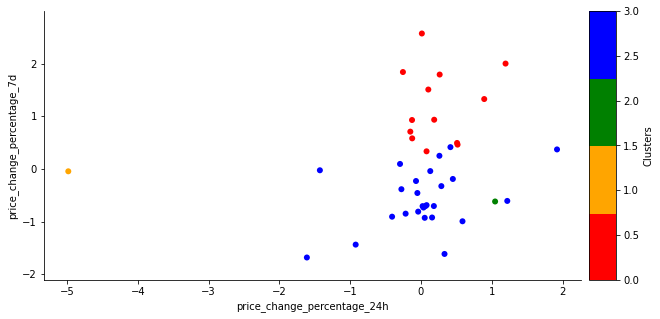

In [24]:
# Define a custom colormap with four distinct colors (0 to 3)
custom_colormap = {0: "red", 1: "green", 2: "blue", 3: "orange"}

# Create a scatter plot using hvPlot by setting 
scatter_plot = df_market_predictions.hvplot.scatter(
    x="price_change_percentage_24h", # `x="price_change_percentage_24h"`
    y="price_change_percentage_7d", # `y="price_change_percentage_7d"`. 
    c="Clusters",  # Color the graph points with the labels found using K-Means
    cmap=custom_colormap,
    hover_cols=["Ticker"], # add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot



---

### Optimize Clusters with Principal Component Analysis.

In [25]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [26]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca_data = pca.fit_transform(df_market_predictions)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ]])

In [27]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36941241, 0.29169375, 0.22893878])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = 0.36941241 + 0.29169375 + 0.22893878

Total Explained Variance ≈ 0.89004494

In [28]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
df_market_pca["Ticker"] = df_market_data.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("Ticker")

# Display sample data
df_market_pca.head() 

,PC1,PC2,PC3
Ticker,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values from 1 to 11
PCA_k_values = list(range(1, 12))

In [30]:
# Create an empty list to store the inertia values
PCA_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in PCA_k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # 2. Fit the model to the data using `df_market_pca`
    kmeans.fit(df_market_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    PCA_inertia_values.append(kmeans.inertia_)

In [31]:
# Create a dictionary with the data to plot the Elbow curve
PCA_elbow_data = {'k': PCA_k_values, 'inertia': PCA_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
PCA_elbow_df = pd.DataFrame(PCA_elbow_data)

# Display the DataFrame
PCA_elbow_df

,k,inertia
0,1,325.734740
1,2,201.287622
2,3,111.736809
3,4,40.197284
4,5,29.945909
5,6,21.021516
6,7,15.454247
7,8,12.010275
8,9,10.313707
9,10,7.938235


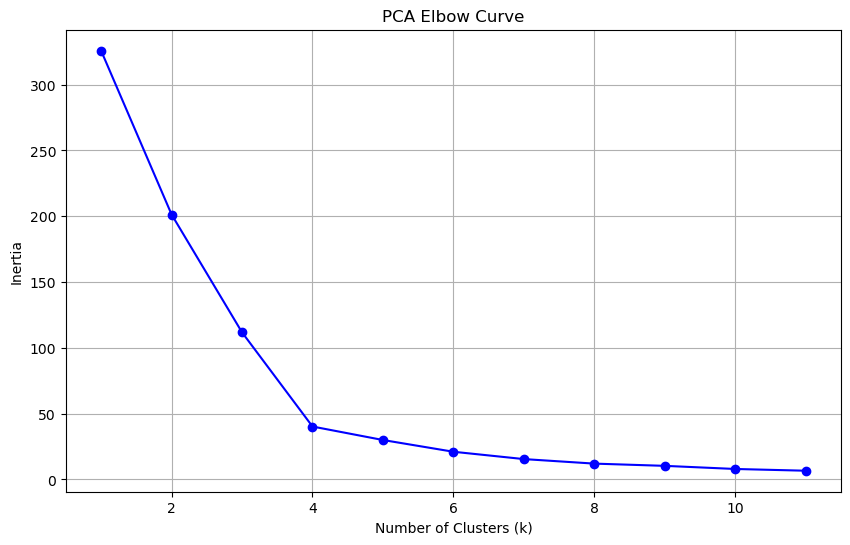

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(PCA_elbow_df['k'], PCA_elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('PCA Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
model_PCA = KMeans(n_clusters=4, random_state=0, n_init=10)

In [34]:
# Fit the K-Means model using the PCA data
model_PCA.fit(df_market_pca)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [35]:
# Predict the clusters using the K-Means model
PCA_k4 = model_PCA.predict(df_market_pca)

# Print the resulting array of cluster values
print(PCA_k4)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [36]:
# Create a copy of the DataFrame with the PCA data
df_PCA_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_PCA_predictions["Clusters"] = PCA_k4

# Display sample data
df_PCA_predictions.head()

,PC1,PC2,PC3,Clusters
Ticker,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,2
ripple,-1.040919,-0.455234,0.467801,2
bitcoin-cash,3.302764,-1.242458,-0.217276,0


:Scatter   [PC1]   (PC2,Clusters,Ticker)
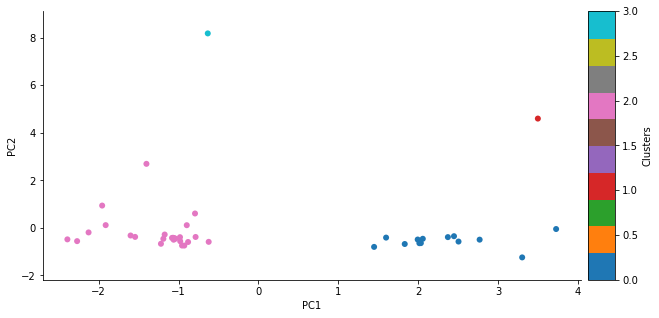

In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot using hvPlot
scatter_plot = df_PCA_predictions.hvplot.scatter(
    x="PC1",  # Set the x-axis to "PC1"
    y="PC2",  # Set the y-axis to "PC2"
    c="Clusters",  # Color the points with the K-Means cluster labels
    cmap="Category10",
    hover_cols=["Ticker"],  # Display the cryptocurrency name on hover
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

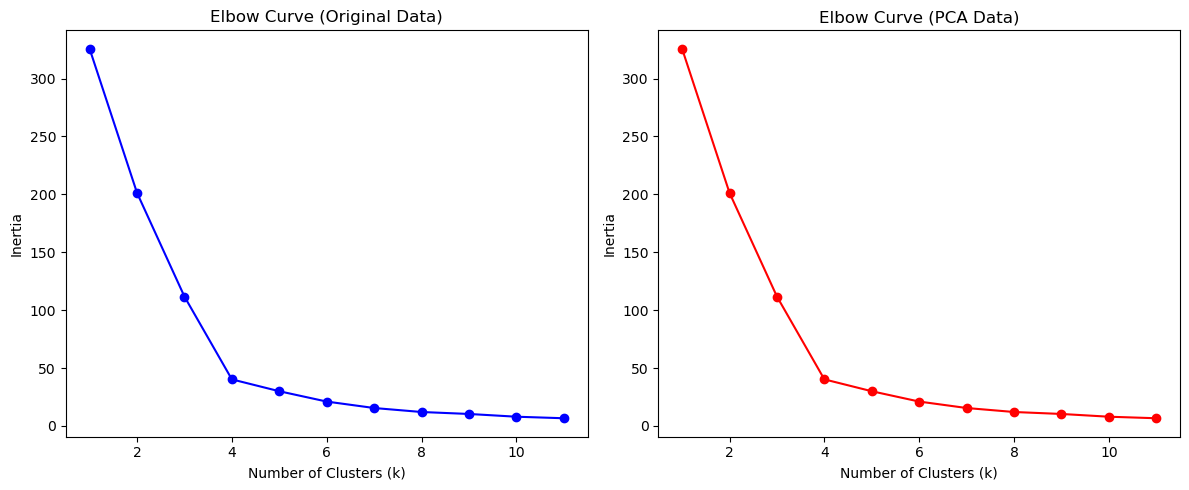

In [38]:
# Composite plot to contrast the Elbow curves
# Create a figure with two subplots (for the original and PCA data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the Elbow curve for the original dataset
ax1.plot(PCA_elbow_df['k'], PCA_elbow_df['inertia'], marker='o', linestyle='-', color='b')
ax1.set_title('Elbow Curve (Original Data)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')

# Plot the Elbow curve for the PCA-transformed dataset
ax2.plot(PCA_elbow_df['k'], PCA_elbow_df['inertia'], marker='o', linestyle='-', color='r')
ax2.set_title('Elbow Curve (PCA Data)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Clusters,Ticker)
   .Scatter.II :Scatter   [PC1]   (PC2,Clusters,Ticker)
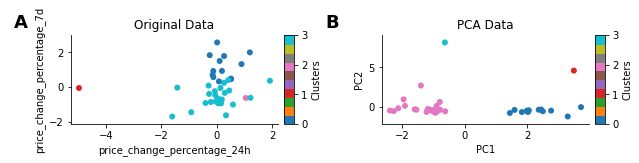

In [39]:
# Composite plot to contrast the clusters
# Create a scatter plot for the original dataset
scatter_original = df_market_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Clusters",  # Use the "Clusters" column for color
    cmap="Category10",  # Colormap for original dataset
    hover_cols=["Ticker"],
    title="Original Data"
)

# Create a scatter plot for the PCA-transformed dataset
scatter_pca = df_PCA_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Clusters",  # Use the "Clusters" column for color
    cmap="Category10",  # Colormap for PCA dataset
    hover_cols=["Ticker"],
    title="PCA Data"
)

# Combine the two scatter plots into a composite plot
composite_plot = scatter_original + scatter_pca

# Display the composite plot
composite_plot


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
By reducing the number of features, we simplify the dataset and make it more manageable. This can be especially helpful when dealing with high-dimensional data, where the original feature space is large. Additionally, fewer features lead to faster training and clustering with K-Means. The algorithm's time complexity is affected by the number of features, so reducing the feature space can significantly speed up the process, especially for large datasets.